In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x_data=np.linspace(0.0,10.0,1000000)
noise=np.random.randn(len(x_data))

In [3]:
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

In [4]:
noise

array([-0.4636122 , -1.42923168,  0.78649386, ...,  0.44779585,
        0.10040729,  0.14049144])

In [5]:
# y=mx+b ,b=5
y_true=(0.5*x_data)+5+noise

In [6]:
x_df=pd.DataFrame(data=x_data,columns=['x_data'])
y_df=pd.DataFrame(data=y_true,columns=['y'])

In [7]:
x_df.head()

,x_data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [8]:
y_df.head()

,y
0,4.536388
1,3.570773
2,5.786504
3,4.233481
4,4.806918


In [9]:
my_data=pd.concat([x_df,y_df],axis=1)

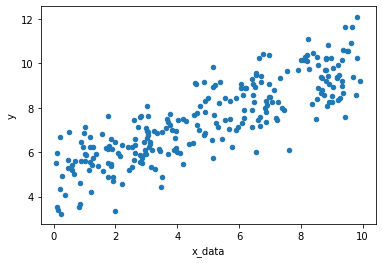

In [10]:
#plotting
my_data.sample(n=250).plot(kind="scatter",x="x_data",y="y")

In [11]:
batch_size=8
m=tf.Variable(0.5)
b=tf.Variable(1.0) 

In [12]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

In [13]:
#print(tf.__version__)

1.14.0


In [14]:
# model
y_model=m*xph + b

In [18]:
# cost function
error=tf.reduce_sum(tf.square(yph-y_model))
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001)
train=optimizer.minimize(error)

In [19]:
init=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    batches=1000
    for i in range(batches):
        rand_ind =np.random.randint(len(x_data),size=batch_size)
        feed={xph:x_data[rand_ind],yph:y_true[rand_ind]}
        sess.run(train,feed_dict=feed)
        model_m,model_b=sess.run([m,b])

In [20]:
model_m

0.5289391

In [21]:
model_b

4.9027452

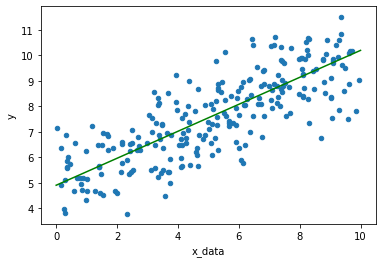

In [24]:
y_hat=x_data*model_m + model_b
my_data.sample(n=250).plot(kind="scatter",x="x_data",y="y")
plt.plot(x_data,y_hat,"g")

In [1]:
from sklearn.model_selection import train_test_split